In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [2]:
results = pd.read_csv('../main/log/tie_new.csv', names=["algo", "experiment_id","only_inflate",   "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"])

In [3]:
results.head()

,algo,experiment_id,only_inflate,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,...,elite_blocks,tie_inflate,diff_sn_inflate,size_sn_inflate,tie_deflate,diff_sn_deflate,size_sn_deflate,tie_mb_deflate,diff_sn_mb_deflate,size_sn_mb_deflate
0,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,0,15.497589,0.123029,1490.0,14.884969,...,1,0.19,99,100,0.00,1,100,0.0,1,100
1,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,1,15.032771,0.076619,1978.0,13.992104,...,2,0.09,97,100,0.00,1,100,0.0,1,100
2,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,2,14.925724,0.074076,2638.0,14.261933,...,3,0.55,99,100,0.01,1,100,0.0,1,100
3,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,3,14.128039,0.085020,3580.0,13.088785,...,4,0.34,100,100,0.01,2,100,0.0,3,100
4,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,4,13.637058,0.084020,4234.0,12.700195,...,5,0.45,99,100,0.02,3,100,0.0,7,100


In [4]:
results = results.query("only_inflate == False")

In [5]:
# results["tie_deflate"] = results["tie_deflate"]*100 / results["diff_sn_deflate"]
# results["tie_mb_deflate"] = results["tie_mb_deflate"]*100 / results["diff_sn_mb_deflate"]
# results["tie_inflate"] = results["tie_inflate"]*100 / results["diff_sn_inflate"]

In [6]:
results.algo.unique()

array(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG'], dtype=object)

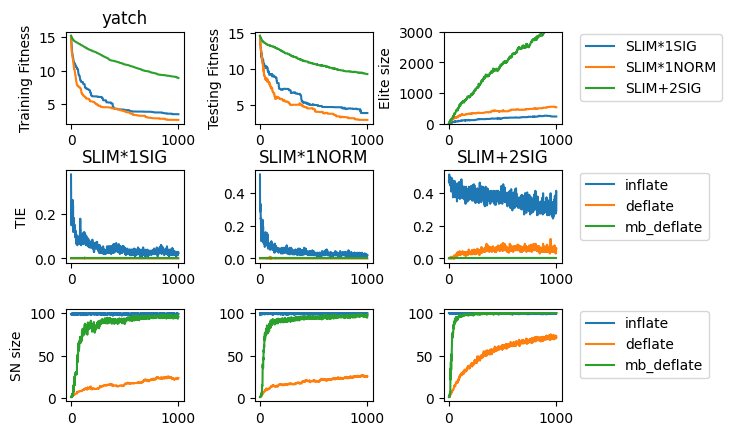

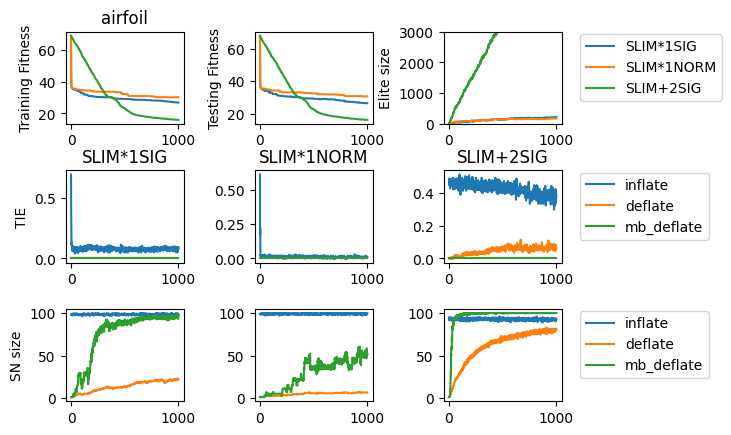

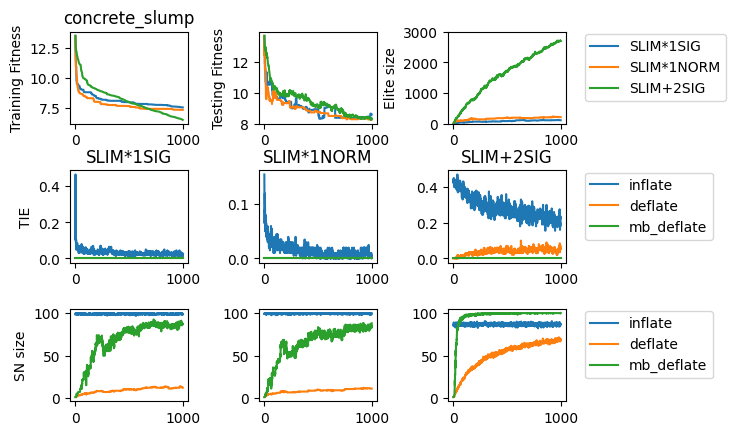

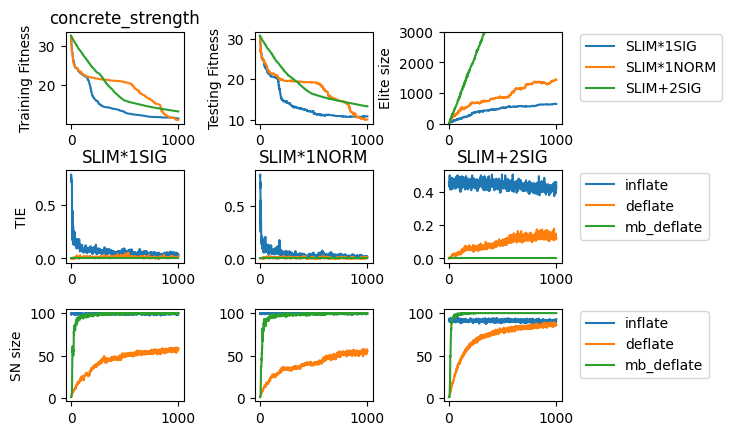

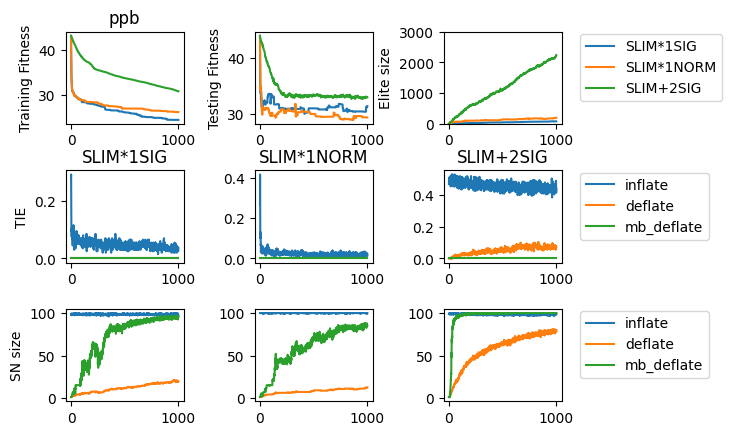

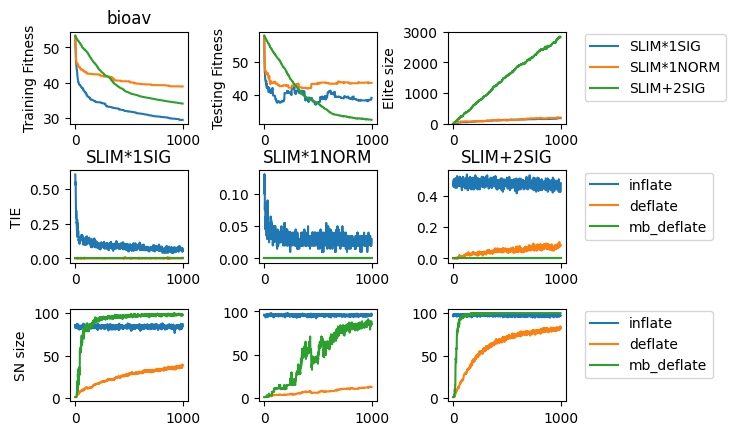

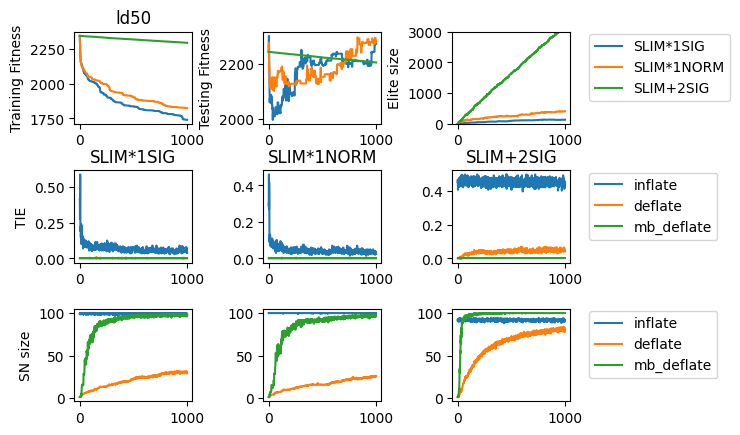

In [7]:
for data in results.dataset.unique():
    gs = gridspec.GridSpec(3, 3)
    gs.update( wspace=0.6, hspace =  0.5)
    pl.figure()
    for algo in results.algo.unique():
        
            
            grouped = results.query("algo == @algo and dataset == @data")[['generation',  "training_fitness",
                                       "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], label = algo)
            ax1.set_ylabel('Training Fitness')
            ax1.set_title(data)
    
            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], label = algo)
            ax2.set_ylabel('Testing Fitness')


            ax3 = pl.subplot(gs[0, 2]) 
            pl.plot(grouped.index, grouped['elite_size'], label = algo)
            ax3.set_ylim(0, 3000)
            ax3.set_ylabel('Elite size')
            ax3.legend(bbox_to_anchor=(1.1, 1.05))
            
            
            if algo == 'SLIM*1SIG':
                ax4 = pl.subplot(gs[1, 0]) #1,1 
                pl.plot(grouped.index, grouped['tie_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['tie_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['tie_mb_deflate'], label = 'mb_deflate')
                ax4.set_ylabel('TIE')
                ax4.set_title(algo)
            
            if algo == 'SLIM*1NORM':
                ax5 = pl.subplot(gs[1, 1]) #1,1 
                pl.plot(grouped.index, grouped['tie_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['tie_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['tie_mb_deflate'], label = 'mb_deflate')
                ax5.set_title(algo)
            
            if algo == 'SLIM+2SIG':
                ax6 = pl.subplot(gs[1, 2]) #1,1 
                pl.plot(grouped.index, grouped['tie_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['tie_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['tie_mb_deflate'], label = 'mb_deflate')
                ax6.set_title(algo)
                ax6.legend(bbox_to_anchor=(1.1, 1.05))
                
            if algo == 'SLIM*1SIG':
                ax7 = pl.subplot(gs[2, 0]) #1,1 
                pl.plot(grouped.index, grouped['diff_sn_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['diff_sn_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['diff_sn_mb_deflate'], label = 'mb_deflate')
                ax7.set_ylabel('SN size')
#                 ax7.set_title(algo)
            
            if algo == 'SLIM*1NORM':
                ax8 = pl.subplot(gs[2, 1]) #1,1 
                pl.plot(grouped.index, grouped['diff_sn_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['diff_sn_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['diff_sn_mb_deflate'], label = 'mb_deflate')
#                 ax8.set_title(algo)
            
            if algo == 'SLIM+2SIG':
                ax9 = pl.subplot(gs[2, 2]) #1,1 
                pl.plot(grouped.index, grouped['diff_sn_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['diff_sn_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['diff_sn_mb_deflate'], label = 'mb_deflate')
#                 ax9.set_title(algo)
                ax9.legend(bbox_to_anchor=(1.1, 1.05))
            



#     plt.tight_layout()
    plt.show()